>index

```
Step 1. Prepare datasets and EDA
     1-1. Seperate columns with numerical columns and categorical columns
     1-2. Visualize distribution of data in categorical columns
     1-3. Show distribution of data in numerical columns
     1-4. Null check for categorical values
     1-5. Replace Null value with the mode of each column data

Step 2. Data Preprocessing for ML
     2-1. Seperate X(Input) and y(Output, forcasting)
     2-2. Transform y's value to number(one-hot-encoding)
     2-3. Transfer X's categorical value to text(one-hot-encoding)
     2-4. Split X data to train-set and test-set
     2-5. Standard Scailing for numerical values - train and test dataset
     2-6. PCA(Principal Component Analysis) and Standard Scailing for sparse values - train and test dataset
     2-7. Concatenation numerical values and sparse values
     2-8. Check the distribution of two datasets - train and test dataset

Step 3. Modeling and Prediction
     3-1. Logistic Regression
     3-2. Random Forest
     3-3. XGBoost
     3-4. Light GBM
     3-5. Deep Learning
```


## Step 1. Prepare datasets and EDA

In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from keras import models
from keras import layers

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings(action='ignore')
plt.style.use(['seaborn'])

pd.set_option('display.precision', 2)
pd.options.display.float_format = '{:.2f}'.format

In [145]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('./data/adult.data', names=col_names)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 1-1. Seperate columns with numerical columns and categorical columns

In [147]:
num_cols = []
cat_cols = []
for col in df.columns:
    if df[col].dtype == 'int64':
        num_cols.append(col)
    else:
        cat_cols.append(col)

print(f'num_cols : {len(num_cols)} cat_cols : {len(cat_cols)} all_cols : {len(df.columns)}')
        

num_cols : 6 cat_cols : 9 all_cols : 15


### 1-2. Visualize distribution of data in categorical columns

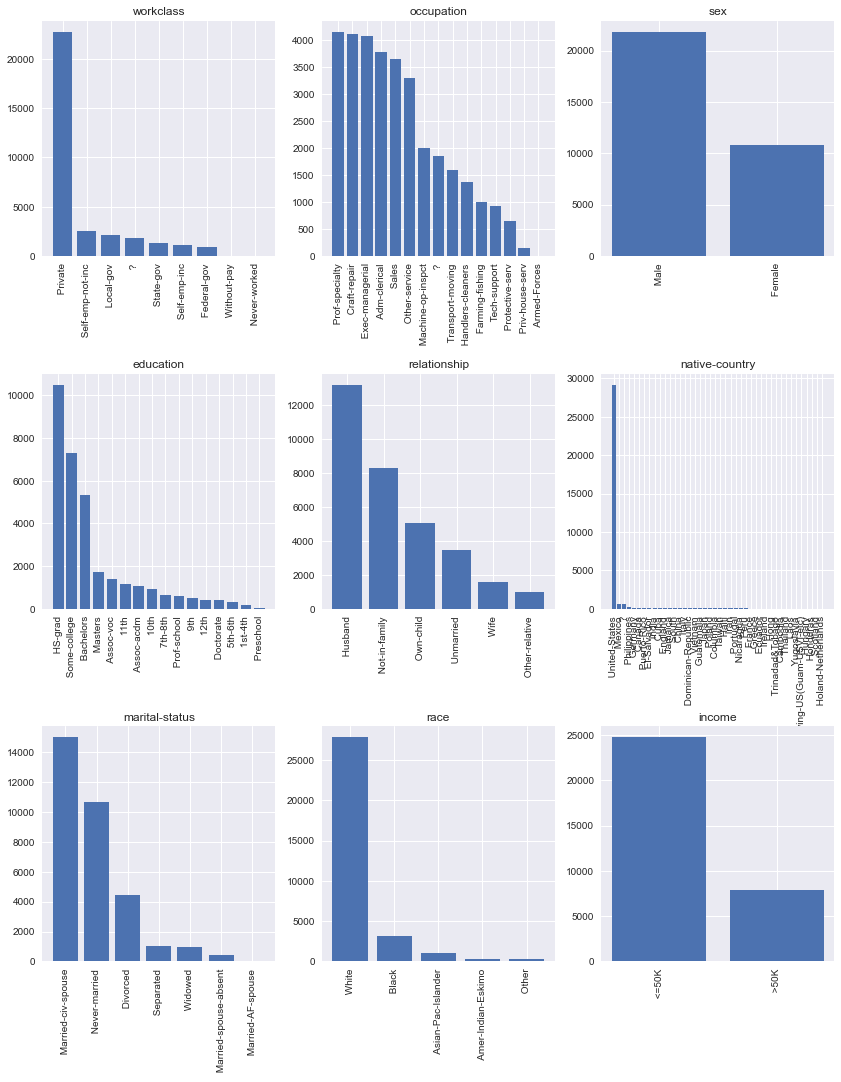

In [148]:
fig, axes = plt.subplots(nrows=3, ncols=3)
for i in range(len(cat_cols)):
    x = df[cat_cols[i]].value_counts().index
    y = df[cat_cols[i]].value_counts().values
    axes[i%3, i//3].bar(x=x, height=y)
    axes[i%3, i//3].set_title(cat_cols[i])
    axes[i%3, i//3].set_xticklabels(x, rotation=90)

plt.subplots_adjust(top=2.5, hspace=0.5, right=1.5)

### 1-3. Show distribution of data in numerical columns

In [149]:
df[num_cols].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [150]:
for i in  range(len(num_cols)):
    print(i//3, i%3)

0 0
0 1
0 2
1 0
1 1
1 2


In [151]:
num_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [152]:
df[num_cols[0]].value_counts().sort_index()

17    395
18    550
19    712
20    753
21    720
     ... 
85      3
86      1
87      1
88      3
90     43
Name: age, Length: 73, dtype: int64

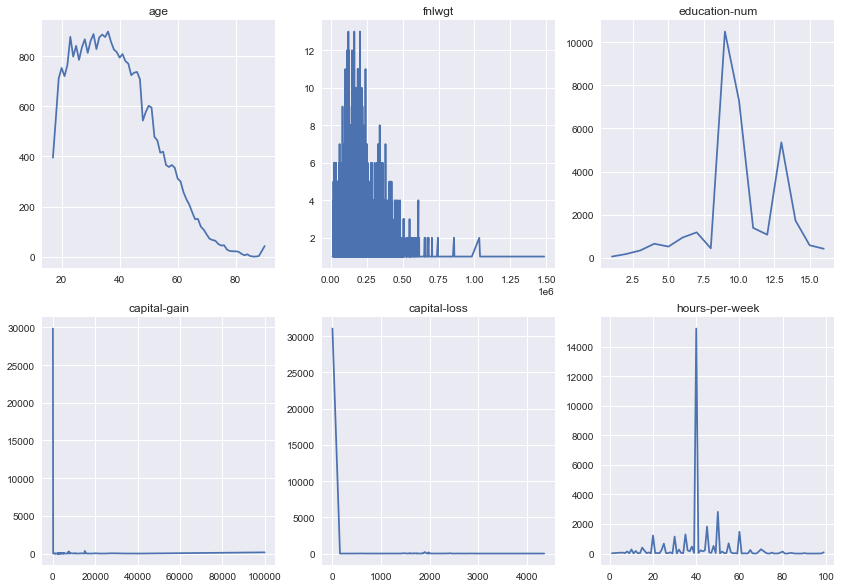

In [153]:
fig, axes = plt.subplots(nrows=2, ncols=3)
for i in range(len(num_cols)):
    srs = df[num_cols[i]].value_counts().sort_index()
    x = srs.index
    y = srs.values
    axes[i//3, i%3].plot(x, y)
    axes[i//3, i%3].set_title(num_cols[i])

plt.subplots_adjust(top=1.5, hspace=0.2, right=1.5)

### 1-4. Null check for categorical values 

In [154]:
value_dicts = {}
for col in cat_cols:
    value_dicts[col] = df[col].value_counts()

In [155]:
value_dicts

{'workclass':  Private             22696
  Self-emp-not-inc     2541
  Local-gov            2093
  ?                    1836
  State-gov            1298
  Self-emp-inc         1116
  Federal-gov           960
  Without-pay            14
  Never-worked            7
 Name: workclass, dtype: int64,
 'education':  HS-grad         10501
  Some-college     7291
  Bachelors        5355
  Masters          1723
  Assoc-voc        1382
  11th             1175
  Assoc-acdm       1067
  10th              933
  7th-8th           646
  Prof-school       576
  9th               514
  12th              433
  Doctorate         413
  5th-6th           333
  1st-4th           168
  Preschool          51
 Name: education, dtype: int64,
 'marital-status':  Married-civ-spouse       14976
  Never-married            10683
  Divorced                  4443
  Separated                 1025
  Widowed                    993
  Married-spouse-absent      418
  Married-AF-spouse           23
 Name: marital-status, dt

### 1-5. Replace Null('?') value with the mode of each colume data

In [156]:
col_have_null = []
for col in cat_cols:
    if ' ?' in value_dicts[col].index:
        col_have_null.append(col)
        
print(col_have_null)

['workclass', 'occupation', 'native-country']


In [157]:
df[col].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [158]:
for col in col_have_null:
    md = df[col].mode()
    df[col].replace({' ?':md.values[0]}, inplace=True)
    print(df[col].value_counts())


 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64
 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England    

## Step 2. Data Preprocessing for ML

### 2-1. Seperate X(Input) and y(Output, forcasting)

In [159]:
raw_y = df['income']
raw_X = df.drop(['income'], axis=1)

print(raw_X.shape, raw_y.shape)

(32561, 14) (32561,)


### 2-2. Transform y's value to number(one-hot-encoding)

In [160]:
raw_y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [161]:
raw_y.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [162]:
raw_y.apply(lambda x : 0 if x == ' <=50K' else 1).value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [163]:
y = raw_y.apply(lambda x : 0 if x == ' <=50K' else 1)
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

### 2-3. Transfer X's categorical value to text(one-hot-encoding)

In [143]:
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [164]:
cat_cols.remove('income')
print(cat_cols)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [165]:
raw_X[cat_cols]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [183]:
num_X = raw_X[num_cols]
cat_X = raw_X[cat_cols]

cat_X = pd.get_dummies(cat_X)
cat_X

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [184]:
X = pd.concat([num_X, cat_X], axis=1)
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### 2-4. Split X data to train-set and test-set 

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24420, 105) (8141, 105) (24420,) (8141,)


In [199]:
num_X_train = X_train[num_cols]
num_X_test = X_test[num_cols]

sparse_X_train = X_train.drop(num_cols, axis=1)
sparse_X_test = X_test.drop(num_cols, axis=1)

### 2-5. Standard Scaling for numerical values - train and test dataset

In [310]:
scaler = StandardScaler()

X_train_scaled_arr = scaler.fit_transform(num_X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns = num_cols)

X_test_scaled_arr = scaler.transform(num_X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=num_cols)

In [311]:
X_train_scaled

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,-0.55,-0.11,1.13,1.67,-0.21,1.59
1,0.76,-0.68,-0.03,-0.15,-0.21,-0.03
2,-0.92,0.37,-0.42,-0.15,-0.21,-0.03
3,-0.99,1.46,-0.42,-0.15,-0.21,0.78
4,-1.21,-0.62,0.36,-0.15,-0.21,-0.84
...,...,...,...,...,...,...
24415,1.13,0.34,-0.03,-0.15,-0.21,0.78
24416,-1.36,-0.62,-0.42,-0.15,-0.21,-0.84
24417,-0.41,-0.15,-0.42,-0.15,3.51,-0.19
24418,0.98,0.89,-0.03,-0.15,-0.21,0.38


In [312]:
X_test_scaled

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,-0.77,0.00,1.52,-0.15,-0.21,-0.03
1,0.25,0.00,0.36,-0.15,-0.21,-0.03
2,0.76,-0.64,1.52,-0.15,-0.21,0.38
3,-0.26,0.80,-2.37,-0.15,-0.21,3.22
4,-0.12,1.27,-0.42,-0.15,-0.21,1.59
...,...,...,...,...,...,...
8136,1.20,0.22,-1.20,-0.15,-0.21,-0.03
8137,-0.92,-0.56,1.13,-0.15,-0.21,-0.44
8138,0.25,0.43,0.75,-0.15,-0.21,0.78
8139,-0.12,-0.54,-0.42,-0.15,-0.21,-0.03


### 2-6 PCA(Principal Component Analysis) and Standard Scailing for sparse values - train and test dataset

In [313]:
pca = PCA(n_components=3)
pca_cols = ["red_1", "red_2", "red_3"]

X_train_reduced_arr = pca.fit_transform(sparse_X_train)
X_train_reduced = pd.DataFrame(X_train_reduced_arr, columns=pca_cols)

X_test_reduced_arr = pca.transform(sparse_X_test)
X_test_reduced = pd.DataFrame(X_test_reduced_arr, columns=pca_cols)

In [314]:
X_train_reduced

,red_1,red_2,red_3
0,1.37,0.07,-0.55
1,-1.06,0.12,-0.66
2,1.05,0.60,0.87
3,-0.96,0.04,0.80
4,1.27,-0.06,-0.15
...,...,...,...
24415,-1.09,0.12,-0.67
24416,1.22,-0.12,0.71
24417,0.27,1.09,0.43
24418,-1.04,-0.12,-0.25


In [209]:
X_test_reduced

,red_1,red_2,red_3
0,0.408474,-0.987883,-0.413004
1,0.947914,0.958552,0.087762
2,-1.088312,0.279224,-0.655309
3,0.921724,0.828556,0.120947
4,0.345637,-0.992845,0.586675
...,...,...,...
8136,1.067648,0.961088,0.190738
8137,1.117162,0.161710,-0.789094
8138,-1.086795,-0.053501,0.072100
8139,0.936498,0.949841,0.880186


In [315]:
pca_cols

['red_1', 'red_2', 'red_3']

In [316]:
scaler = StandardScaler()

X_train_reduced_scaled_arr = scaler.fit_transform(X_train_reduced)
X_train_reduced_scaled = pd.DataFrame(X_train_reduced_scaled_arr, columns=pca_cols)

X_test_reduced_scaled_arr = scaler.transform(X_test_reduced)
X_test_reduced_scaled = pd.DataFrame(X_test_reduced_scaled_arr, columns=pca_cols)

### 2-7. Concatenation numerical values and sparse values

In [317]:
X_train = pd.concat([X_train_scaled, X_train_reduced_scaled], axis=1)
X_test = pd.concat([X_test_scaled, X_test_reduced_scaled], axis=1)

print(X_train.shape, X_test.shape)

(24420, 9) (8141, 9)


In [318]:
X_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,red_1,red_2,red_3
0,-0.55,-0.11,1.13,1.67,-0.21,1.59,1.48,0.13,-1.00
1,0.76,-0.68,-0.03,-0.15,-0.21,-0.03,-1.14,0.20,-1.20
2,-0.92,0.37,-0.42,-0.15,-0.21,-0.03,1.13,1.01,1.59
3,-0.99,1.46,-0.42,-0.15,-0.21,0.78,-1.04,0.07,1.46
4,-1.21,-0.62,0.36,-0.15,-0.21,-0.84,1.37,-0.10,-0.27
...,...,...,...,...,...,...,...,...,...
24415,1.13,0.34,-0.03,-0.15,-0.21,0.78,-1.17,0.20,-1.23
24416,-1.36,-0.62,-0.42,-0.15,-0.21,-0.84,1.32,-0.21,1.30
24417,-0.41,-0.15,-0.42,-0.15,3.51,-0.19,0.29,1.85,0.78
24418,0.98,0.89,-0.03,-0.15,-0.21,0.38,-1.12,-0.20,-0.45


In [319]:
X_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,red_1,red_2,red_3
0,-0.77,0.00,1.52,-0.15,-0.21,-0.03,0.44,-1.67,-0.75
1,0.25,0.00,0.36,-0.15,-0.21,-0.03,1.02,1.62,0.16
2,0.76,-0.64,1.52,-0.15,-0.21,0.38,-1.17,0.47,-1.19
3,-0.26,0.80,-2.37,-0.15,-0.21,3.22,0.99,1.40,0.22
4,-0.12,1.27,-0.42,-0.15,-0.21,1.59,0.37,-1.68,1.07
...,...,...,...,...,...,...,...,...,...
8136,1.20,0.22,-1.20,-0.15,-0.21,-0.03,1.15,1.63,0.35
8137,-0.92,-0.56,1.13,-0.15,-0.21,-0.44,1.20,0.27,-1.44
8138,0.25,0.43,0.75,-0.15,-0.21,0.78,-1.17,-0.09,0.13
8139,-0.12,-0.54,-0.42,-0.15,-0.21,-0.03,1.01,1.61,1.60


### 2-8. Check the distribution of two datasets - train and test dataset

In [321]:
X_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,red_1,red_2,red_3
count,24420.00,24420.00,24420.00,24420.00,24420.00,24420.00,24420.00,24420.00,24420.00
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.58,-1.66,-3.54,-0.15,-0.21,-3.20,-1.34,-2.07,-1.88
25%,-0.77,-0.68,-0.42,-0.15,-0.21,-0.03,-1.10,-0.31,-0.77
50%,-0.12,-0.11,-0.03,-0.15,-0.21,-0.03,0.30,0.04,-0.34
75%,0.69,0.45,0.75,-0.15,-0.21,0.38,0.99,0.43,1.07
max,3.76,12.20,2.30,12.75,10.70,4.76,1.64,2.34,2.17


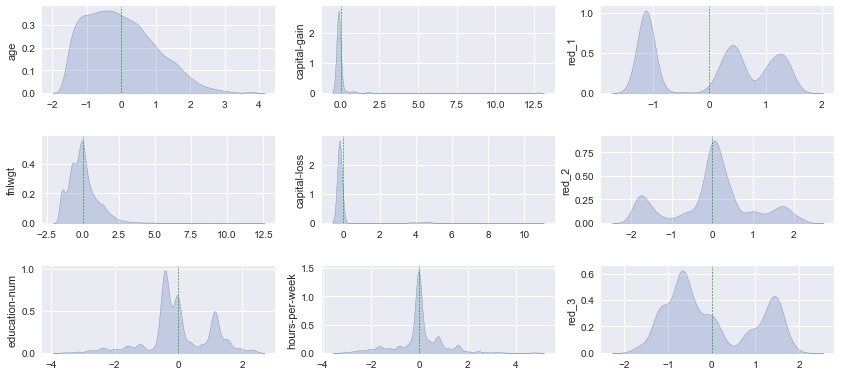

In [332]:
X_cols = X_train.columns

fig, axes = plt.subplots(nrows=3, ncols=3)
for i in range(len(X_cols)):
    sns.kdeplot(x=X_train[X_cols[i]].values, shade=True, ax=axes[i%3, i//3])
    axes[i%3, i//3].set_ylabel(X_cols[i])
    axes[i%3, i//3].axvline(x=0, color='g', linestyle='--', linewidth=0.6)

plt.subplots_adjust(top=1.0, hspace=0.5, right=1.5)

In [330]:
X_test.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,red_1,red_2,red_3
count,8141.00,8141.00,8141.00,8141.00,8141.00,8141.00,8141.00,8141.00,8141.00
mean,0.00,-0.02,-0.01,-0.03,0.02,0.02,-0.00,0.01,-0.02
std,0.99,0.98,1.01,0.79,1.04,1.01,1.00,1.01,0.99
min,-1.58,-1.68,-3.54,-0.15,-0.21,-3.20,-1.34,-2.06,-1.88
25%,-0.77,-0.68,-0.42,-0.15,-0.21,-0.03,-1.11,-0.31,-0.77
50%,-0.12,-0.12,-0.03,-0.15,-0.21,-0.03,0.30,0.04,-0.35
75%,0.69,0.42,0.75,-0.15,-0.21,0.38,0.98,0.44,1.01
max,3.76,9.77,2.30,12.75,9.23,4.76,1.63,2.32,2.17


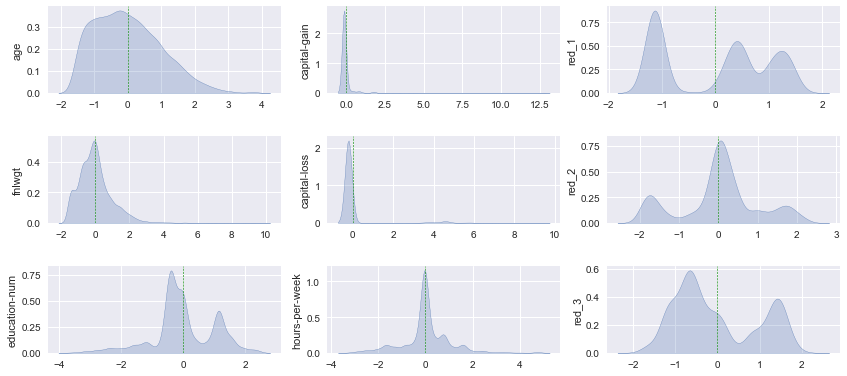

In [331]:
fig, axes = plt.subplots(nrows=3, ncols=3)
for i in range(len(X_cols)):
    sns.kdeplot(x=X_test[X_cols[i]].values, shade=True, ax=axes[i%3, i//3])
    axes[i%3, i//3].set_ylabel(X_cols[i])
    axes[i%3, i//3].axvline(x=0, color='g', linestyle='--', linewidth=0.6)

plt.subplots_adjust(top=1.0, hspace=0.5, right=1.5)

In [357]:
y_train.value_counts()

0    18549
1     5871
Name: income, dtype: int64

In [335]:
y_test.value_counts()


0    6171
1    1970
Name: income, dtype: int64

## Step 3. Modeling and Prediction

### 3-1. Logistic Regression

In [337]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [350]:
print('Accuracy : {:.2f}'.format((y_test == pred).sum() / len(y_test)))

Accuracy : 0.84


In [351]:
report = classification_report(y_test, pred)
print(report)


              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6171
           1       0.72      0.56      0.63      1970

    accuracy                           0.84      8141
   macro avg       0.79      0.74      0.76      8141
weighted avg       0.83      0.84      0.83      8141



- 0 : <=50K
- 1 :  >50K 
---
Precision
- 연소득 $50,000 이하로 예측한 케이스의 87% 일치
- 연소득 $50,000 초과로 예측한 케이스의 72% 일치

Recall
- 실제 연소득 $50,000 이하 케이스 중 93% 정상 분류
- 실제 연소득 $50,000 초과 케이스 중 56% 정상 분류

데이터 불균형으로 연소득 $50,000에 대한 예측 성능이 더 우수

### 3-2. Random Forest

In [355]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)
print('Accuracy : {:.2f}'.format((pred==y_test).sum()/len(pred)))

Accuracy : 0.86


In [356]:
report = classification_report(y_test, pred)
print(report)


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6171
           1       0.74      0.62      0.68      1970

    accuracy                           0.86      8141
   macro avg       0.81      0.78      0.79      8141
weighted avg       0.85      0.86      0.85      8141



Precision
- 연소득 $50,000 이하로 예측한 케이스의 89% 일치
- 연소득 $50,000 초과로 예측한 케이스의 74% 일치

Recall
- 실제 연소득 $50,000 이하 케이스 중 93% 정상 분류
- 실제 연소득 $50,000 초과 케이스 중 62% 정상 분류

마찬가지로 데이터 불균형으로 연소득 $50,000에 대한 예측 성능이 더 우수하지만 Linear Model보다 부족한 데이터셋에 대한 예측력이 좋음

### 3-3. XGBoost

In [360]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

print('Accuracy : {:.2f}'.format((pred==y_test).sum()/len(pred)))

Accuracy : 0.87


In [361]:
report = classification_report(y_test, pred)
print(report)


              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6171
           1       0.76      0.65      0.70      1970

    accuracy                           0.87      8141
   macro avg       0.83      0.79      0.81      8141
weighted avg       0.86      0.87      0.86      8141



Precision
- 연소득 $50,000 이하로 예측한 케이스의 89% 일치
- 연소득 $50,000 초과로 예측한 케이스의 76% 일치

Recall
- 실제 연소득 $50,000 이하 케이스 중 94% 정상 분류
- 실제 연소득 $50,000 초과 케이스 중 65% 정상 분류

기본 배깅 방식에서 개선된 학습 알고리즘인 랜덤포레스트보다도 부스팅 알고리즘이 성능이 좋았음.

### 3-4. Light GBM

In [364]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)

print('Accuracy : {:.2f}'.format((pred==y_test).sum()/len(pred)))

Accuracy : 0.87


In [365]:
report = classification_report(y_test, pred)
print(report)


              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6171
           1       0.76      0.64      0.70      1970

    accuracy                           0.87      8141
   macro avg       0.83      0.79      0.81      8141
weighted avg       0.86      0.87      0.86      8141



Precision
- 연소득 $50,000 이하로 예측한 케이스의 89% 일치
- 연소득 $50,000 초과로 예측한 케이스의 76% 일치

Recall
- 실제 연소득 $50,000 이하 케이스 중 94% 정상 분류
- 실제 연소득 $50,000 초과 케이스 중 64% 정상 분류

위에서 확인한 XGBoost와 매우 유사한 수치 확인. 하이퍼파라미터를 사용하지 않는다면 Boosting 계열간 큰 차이는 볼 수 없음

### 3-5. Deep Learning

In [368]:
X_train.shape

(24420, 9)

In [396]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(9,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train,
          epochs=20,
          batch_size=50,
          validation_data=(X_test, y_test))

Epoch 1/20
489/489 [==============================] - 1s 1ms/step - loss: 0.4440 - accuracy: 0.7925 - val_loss: 0.3439 - val_accuracy: 0.8411
Epoch 2/20
489/489 [==============================] - 1s 1ms/step - loss: 0.3328 - accuracy: 0.8412 - val_loss: 0.3373 - val_accuracy: 0.8456
Epoch 3/20
489/489 [==============================] - 0s 872us/step - loss: 0.3255 - accuracy: 0.8462 - val_loss: 0.3300 - val_accuracy: 0.8482
Epoch 4/20
489/489 [==============================] - 0s 895us/step - loss: 0.3171 - accuracy: 0.8516 - val_loss: 0.3292 - val_accuracy: 0.8485
Epoch 5/20
489/489 [==============================] - 1s 1ms/step - loss: 0.3243 - accuracy: 0.8476 - val_loss: 0.3295 - val_accuracy: 0.8444
Epoch 6/20
489/489 [==============================] - 1s 1ms/step - loss: 0.3174 - accuracy: 0.8507 - val_loss: 0.3278 - val_accuracy: 0.8490
Epoch 7/20
489/489 [==============================] - 1s 1ms/step - loss: 0.3200 - accuracy: 0.8502 - val_loss: 0.3279 - val_accuracy: 0.8479
Ep

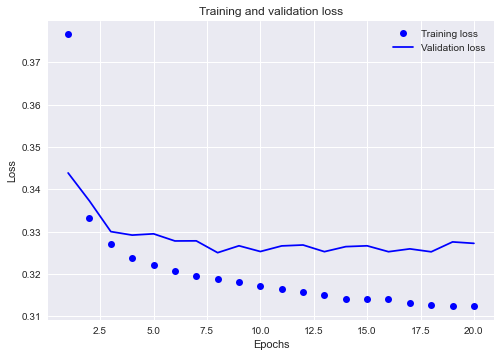

In [397]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  # ‘bo’는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # ‘b’는 파란색 실선을 의미합니다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [399]:
print("test accuracy : {:.2f}".format(max(history_dict['val_accuracy'])))
print("test loss : {:.2f}".format(max(history_dict['val_loss'])))

test accuracy : 0.85
test loss : 0.34


In [410]:
pred = model.predict(X_test)

pred = [0 if x[0] < 0.5 else 1 for x in pred]

report = classification_report(y_test, pred)
print(report)


              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6171
           1       0.70      0.63      0.67      1970

    accuracy                           0.85      8141
   macro avg       0.79      0.77      0.78      8141
weighted avg       0.84      0.85      0.84      8141



Precision
- 연소득 $50,000 이하로 예측한 케이스의 89% 일치
- 연소득 $50,000 초과로 예측한 케이스의 70% 일치

Recall
- 실제 연소득 $50,000 이하 케이스 중 91% 정상 분류
- 실제 연소득 $50,000 초과 케이스 중 63% 정상 분류

Boosting 계열보다 정확도 떨어짐. Logistic Regression보다 불균형 데이터셋에서 살짝 유리하지만, 큰 차이 없음